In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("medical_insurance.csv")

In [3]:
df.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df["sex"].value_counts().to_dict()

{'male': 676, 'female': 662}

In [4]:
df["sex"].replace({'male': 0, 'female': 1}, inplace=True)

In [7]:
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [5]:
df["smoker"].replace({'no': 0, 'yes': 1}, inplace=True)

In [29]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
df = pd.get_dummies(df, columns = ["region"])

In [32]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [7]:
x = df.drop("charges", axis = 1)
y = df["charges"]

In [36]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [37]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1 )

In [39]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
216,53,1,26.600,0,0,0,1,0,0
731,53,0,21.400,1,0,0,0,0,1
866,18,0,37.290,0,0,0,0,1,0
202,60,1,24.035,0,0,0,1,0,0
820,45,0,33.700,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
715,60,0,28.900,0,0,0,0,0,1
905,26,1,29.355,2,0,1,0,0,0
1096,51,1,34.960,2,1,1,0,0,0
235,40,1,22.220,2,1,0,0,1,0


In [40]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
559,19,0,35.530,0,0,0,1,0,0
1087,57,0,31.540,0,0,0,1,0,0
1020,51,0,37.000,0,0,0,0,0,1
460,49,1,36.630,3,0,0,0,1,0
802,21,0,22.300,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
682,39,0,35.300,2,1,0,0,0,1
629,44,1,38.950,0,1,0,1,0,0
893,47,0,38.940,2,1,0,0,1,0
807,19,1,36.575,0,0,0,1,0,0


In [27]:
lr_model = LinearRegression()
lr_model.fit(x_train.values, y_train)

LinearRegression()

## testing data

In [10]:

y_pred = lr_model.predict(x_test)

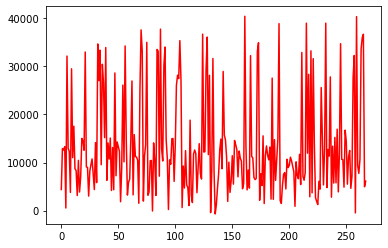

In [45]:
plt.plot(y_pred, color = "red")

In [11]:
mse_test = mean_squared_error(y_test, y_pred)
print("MSE of test data:", mse_test)
rsme_test = np.sqrt(mse_test)
print("RSME of test data:", rsme_test)
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE of test data:", mae_test)
r2_score_test = r2_score(y_test, y_pred)
print("R2 score test:", r2_score_test)

MSE of test data: 35479352.80730362
RSME of test data: 5956.454717976426
MAE of test data: 4051.858766747046
R2 score test: 0.7623311844057112


In [14]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [12]:
dct = {'age':26, 'sex':0, 'bmi':22.5, 'children':0, 'smoker':0, 'region_northeast':0,
       'region_northwest':0, 'region_southeast':1, 'region_southwest':0}
dct

{'age': 26,
 'sex': 0,
 'bmi': 22.5,
 'children': 0,
 'smoker': 0,
 'region_northeast': 0,
 'region_northwest': 0,
 'region_southeast': 1,
 'region_southwest': 0}

In [16]:
test1 = pd.Series(dct)
test1

age                 26.0
sex                  0.0
bmi                 22.5
children             0.0
smoker               0.0
region_northeast     0.0
region_northwest     0.0
region_southeast     1.0
region_southwest     0.0
dtype: float64

In [28]:
age= 26
sex= 0
bmi= 22.5
children= 0
smoker= 0
region_northeast= 0
region_northwest= 0
region_southeast= 1
region_southwest= 0

In [29]:
test = np.array([[age,sex,bmi,children,smoker, region_northeast, region_northwest,region_southeast,region_southwest]])
test

array([[26. ,  0. , 22.5,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ]])

In [30]:
y_check = lr_model.predict(test)[0]
y_check

1353.1000476982972

## training data

In [32]:
y_train_pred = lr_model.predict(x_train.values)
y_train_pred

array([10508.41885042,  8494.95651816,  4049.96586839, ...,
       37680.90202961, 29712.67052236, 11492.98181182])

In [30]:
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE of train data:", mse_train)
rsme_train = np.sqrt(mse_train)
print("RSME of train data:", rsme_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE of train data:", mae_train)
r2_score_train = r2_score(y_train, y_train_pred)
print("R2 score:", r2_score_train)

MSE of train data: 36787756.370462015
RSME of train data: 6065.291120009164
MAE of train data: 4168.751118732004
R2 score: 0.7477680686451552


In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [33]:
age= 26
sex= "male"
bmi= 22.5
children= 2
smoker= "no"
region = "southwest"
# region_northeast= 0
# region_northwest= 0
# region_southeast= 1
# region_southwest= 0

In [34]:
test_array = np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
labled_data = {"sex": {"male": 0, "female": 1}, "smoker":{"no": 0, "yes": 1}}
labled_data

{'sex': {'male': 0, 'female': 1}, 'smoker': {'no': 0, 'yes': 1}}

In [36]:
labled_data["sex"][sex]
labled_data["smoker"][smoker]

0

In [37]:
ref_columns = x.columns
ref_columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [38]:
test_array[0] = age
test_array[1] = labled_data["sex"][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = labled_data["smoker"][smoker]
#test_array[5] = region_index = np.where(ref_columns == region)
#test_array[6] = 
test_array

array([26. ,  0. , 22.5,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [39]:
region = "region_" + region
region

'region_southwest'

In [40]:
region_index = np.where(ref_columns == region)
region_index[0][0]

8

In [41]:
test_array[region_index[0][0]] = 1
test_array

array([26. ,  0. , 22.5,  2. ,  0. ,  0. ,  0. ,  0. ,  1. ])

## check on single row data input

In [42]:
# for smoking and no children
y_check = lr_model.predict([test_array])[0]
np.around(y_check,2)

2304.56

In [121]:
# for no smoking and two children
y_check = lr_model.predict([test_array])[0]
np.around(y_check,2)

2304.56

## creating model file & json file for labled data

In [43]:
import pickle

with open ("lr_model_file.pkl", "wb") as f:
    pickle.dump(lr_model, f)

In [44]:
model_data = {"sex": {"male": 0, "female": 1}, "smoker":{"no": 0, "yes": 1},
             "columns": list(x.columns)}
model_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [45]:
import json

with open("model_data.json", "w") as f:
    json.dump(model_data, f)